In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 畫3D圖
%matplotlib inline

## warmUpExercise

In [2]:
# define a function which returns a 5x5 identity matrix
def warmUpExercise():
    return np.identity(5)

In [3]:
warmUpExercise()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

## plotData

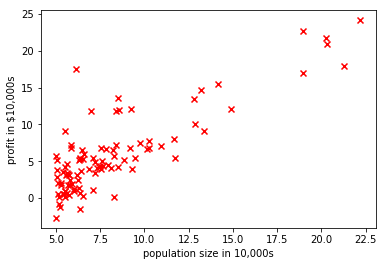

In [4]:
# load data
data = pd.read_csv('ex1/ex1data1.txt', header=None)

# X0 = 1
X0 = pd.DataFrame(np.ones(data.iloc[:,0].shape[0]))

# training matrix X and response vector y
X = pd.concat([X0, data.iloc[:,0]], axis=1)
m, n = X.shape  # m examples, n-1 feature (X0 is added)
y = data.iloc[:,1].values.reshape(m, 1)

# data dimension
m, n = X.shape

# plot data
plt.figure(facecolor='w')
plt.scatter(data.iloc[:,0], y, marker='x', color='red')
plt.xlabel('population size in 10,000s')
plt.ylabel('profit in $10,000s')

## Cost Funtion and Gradient Descent

#### Cost Function

In [5]:
# define linear hypothesis function
def h(X, theta):
    hypothesis = np.dot(X, theta)
    return hypothesis

# define a function which computes cost function
def computeCost(X, y, theta):
    SSE = np.sum((h(X, theta) - y)**2)  # Sum of Squared Error
    J = SSE / (2*m)
    return J

In [6]:
# initialize theta
theta_init = np.zeros([n, 1])  # theta is a vector with n rows and 1 columns(if X has n-1 feature, X0 is added)
computeCost(X, y, theta_init)

32.072733877455676

#### Gradient Descent

In [7]:
def gradientDescent(X, y, theta, iteration, alpha):
    J_history = []
    theta_history = []
    for iters in range(1, num_iters+1):
        theta_history.append(theta.copy())  # 要存取每一次新的theta，須先使用copy，否則新的值會覆寫到舊的值
        J_history.append(computeCost(X, y, theta))
        theta_temp = theta
        for j in range(0, n):  # update theta simultaneously
            theta_temp[j] = theta[j] - (alpha/m) * np.sum((h(X, theta) - y) * X.iloc[:, j].values.reshape(m, 1))
        theta = theta_temp
    return (theta, theta_history, J_history)

Best-fit theta for the minimum cost function is [-3.63606348  1.16698916]
Before gradient descending, cost function J = 32.072734


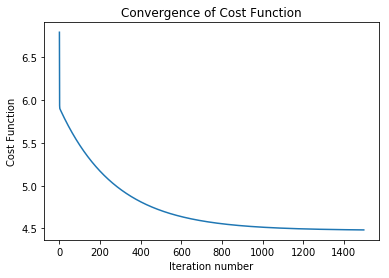

In [9]:
theta_init = np.zeros([n, 1])  # 初始theta
num_iters = 1500  # 迭代次數
alpha = 0.01  # 學習速率
theta, theta_history, Cost_J = gradientDescent(X, y, theta_init, num_iters, alpha)

print('Best-fit theta for the minimum cost function is', theta.ravel())  # ravel:將數據攤平
print('Before gradient descending, cost function J = %f'%(Cost_J[0]))
plt.figure(facecolor='w')
plt.plot(Cost_J[1:])
plt.xlabel('Iteration number')
plt.ylabel('Cost Function')
plt.title('Convergence of Cost Function')

## Plot the Linear Fit and Predict

For population = 35000, we predict the profit is 4483.985781
For population = 70000, we predict the profit is 45328.606317


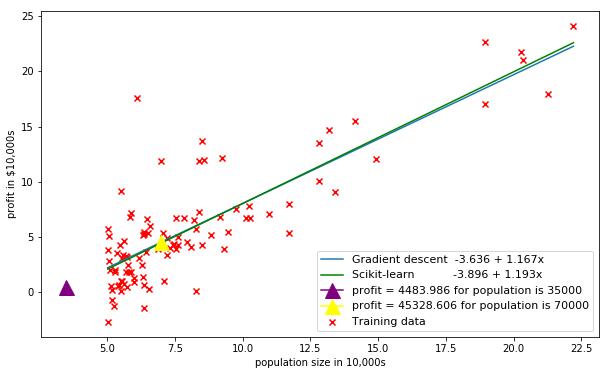

In [10]:
xx = np.linspace(min(data.iloc[:,0]), max(data.iloc[:,0]), 1000)
yy = theta[0] + theta[1] * xx

plt.figure(figsize=(10,6), facecolor='w')
plt.scatter(data.iloc[:,0], y, marker='x', color='red', label='Training data')
plt.plot(xx, yy, label='Gradient descent  %.3f + %.3fx'%(theta[0],theta[1]))

# compare with sklearn linear regression
linreg = LinearRegression()
linreg.fit(X.iloc[:, 1].values.reshape(m, 1), y)
yy_sklearn = linreg.intercept_ + linreg.coef_ * xx
plt.plot(xx, yy_sklearn.ravel(), label='Scikit-learn  %15.3f + %.3fx'
         %(linreg.intercept_, linreg.coef_), c='g')  # ravel的目的是要將資料的dimension弄成一樣

# predict profit with population of 35000, 70000
new_feature = {3.5:'purple', 7.0:'yellow'}
for i in new_feature.keys():
    j = new_feature[i]
    print('For population = %d, we predict the profit is %f'%(i * 10000, np.dot([1, i], theta)*10000))
    plt.plot(i, np.dot([1, i], theta), marker='^', color=j, markersize=15, 
             label='profit = %.3f for population is %d'%(np.dot([1, i], theta) * 10000, i * 10000))

plt.xlabel('population size in 10,000s')
plt.ylabel('profit in $10,000s')
plt.legend(loc=4, fontsize='11')



In [11]:
len(theta_history)

1500

## Visualizing $J(\theta)$

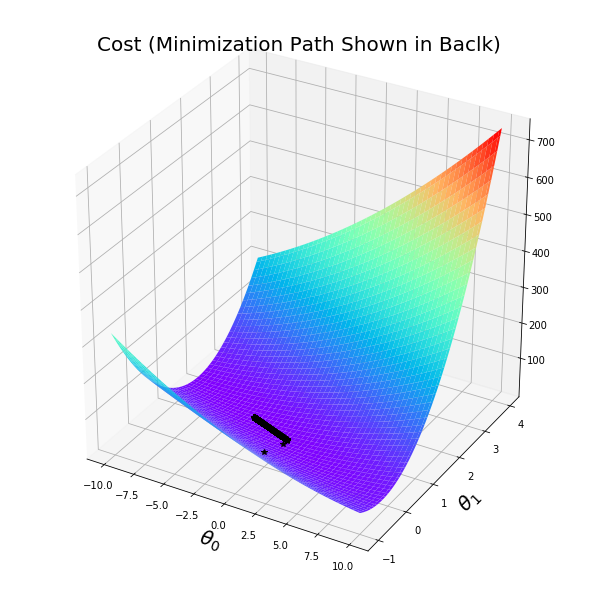

In [12]:
# 定義圖像窗口與3D座標軸
fig = plt.figure(figsize=(8, 8), facecolor='w')
ax = Axes3D(fig)

# 給 x,y 值，建立平面網格，之後計算 z 值
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)
xx3D, yy3D = np.meshgrid(theta0_vals, theta1_vals)
Z = np.zeros([theta0_vals.size, theta1_vals.size])  # 先將Z建立成一零矩陣
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i, j] = computeCost(X, y, theta=np.array([xx3D[i, j], yy3D[i, j]]).reshape(n, 1))

ax.plot_surface(xx3D, yy3D, Z, cmap=plt.cm.rainbow)

for i in range(0, num_iters):
    plt.plot(theta_history[i][0], theta_history[i][1], Cost_J[i], color='black', marker='*')  

plt.title('Cost (Minimization Path Shown in Baclk)',fontsize=20)
plt.xlabel(r'$\theta_0$', fontsize=20)
plt.ylabel(r'$\theta_1$', fontsize=20)

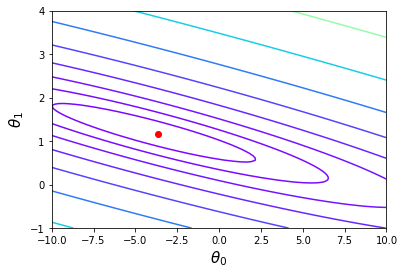

In [13]:
plt.figure(facecolor='w')
plt.contour(xx3D, yy3D, Z, np.logspace(-2, 3, 20), cmap=plt.cm.rainbow)
plt.scatter(theta[0],theta[1], c='r')
plt.xlabel(r'$\theta_0$', fontsize=15)
plt.ylabel(r'$\theta_1$', fontsize=15)